In [1]:
import pandas as pd
import requests
import bs4 as bs
import urllib.request

from general_functions import get_file_contents
from general_functions import load_xml_to_dataframe


url = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade'
filename = 'ServiceKey 국토교통부 아파트매매 실거래.txt'
api_key = get_file_contents(filename)


In [2]:
df = pd.DataFrame()
for ymd in ['202101', '202204', '202205']:
    params = {'serviceKey': api_key, 'LAWD_CD': '50130', 'DEAL_YMD': ymd}
    d = load_xml_to_dataframe(requests.get(url,
                                           params=params
                                           ).text, 'item')
    df = df.append(d, ignore_index=True)


response = requests.get(url, params=params).text


In [3]:
soup = bs.BeautifulSoup(response, 'xml')


import xmltodict
xmltodict.parse(response)


In [4]:
for col in ['거래금액', '건축년도', '년', '층', '일', '월']:
    df[col] = pd.to_numeric(df[col].str.replace(",", ""))


In [5]:
import numpy as np
pd.pivot_table(data=df, index='법정동', columns='거래유형',
               values='거래금액', aggfunc=sum, fill_value=0)


거래유형,,중개거래,직거래
법정동,,,
강정동,1060000,336600,0
동홍동,642300,407100,159400
보목동,19700,0,20500
서귀동,74100,0,20500
서호동,243800,226100,0
서홍동,177631,86450,10000
중문동,319320,247350,81330
토평동,14000,0,0
남원읍 남원리,7300,33000,0


In [6]:
import pydeck as pdk
import streamlit as st


In [7]:
import os
from dotenv import load_dotenv

load_dotenv(verbose=True)
token = os.getenv('MAPBOX_API_KEY')


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

sns.set_palette('Set2')


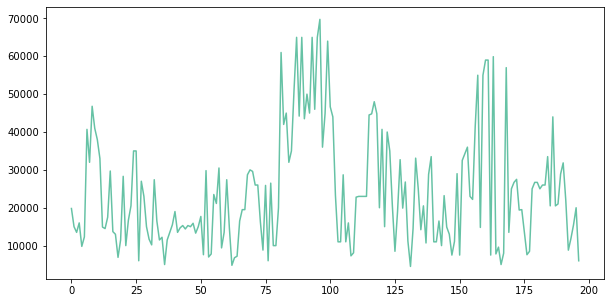

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(df.거래금액)
plt.show()


In [10]:
result = pd.pivot_table(data=df, index='법정동', values='거래금액',
                        aggfunc='sum', fill_value=0).sort_values('거래금액', ascending=False)
result


,거래금액
법정동,
강정동,1396600
동홍동,1208800
중문동,648000
서호동,469900
서홍동,274081
안덕면 화순리,221400
대정읍 상모리,166700
서귀동,94600
대정읍 하모리,65900


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [12]:
df

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,19800,,2005,2021,서귀동,삼다2차빌라트,1,7,84.53,,296-38,50130,4,,
1,15000,,2014,2021,서귀동,서귀포의꿈,1,20,49.68,,285-18,50130,11,21.02.01,O
2,13500,,2014,2021,서귀동,서귀포의꿈,1,20,49.68,,285-18,50130,11,,
3,16000,,2003,2021,서귀동,삼다빌라트,1,22,96.22,,325-22,50130,5,,
4,9800,,1991,2021,서귀동,"명지아파트(가동,나동)",1,27,69.48,,114-1,50130,1,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,8800,중개거래,2016,2022,강정동,다온빌,5,4,26.54,제주 서귀포시,165-4,50130,3,,
193,11900,중개거래,1996,2022,남원읍 남원리,에덴,5,2,60,제주 서귀포시,1323-2,50130,5,,
194,15500,중개거래,2001,2022,성산읍 고성리,"진우파크빌(101,102동)",5,3,59.8944,제주 제주시,1618-1,50130,5,,
195,20000,중개거래,2015,2022,성산읍 고성리,드림펠리스,5,5,69.0088,제주 서귀포시,1123-2,50130,3,,


In [13]:
import plotly.graph_objs as go
import plotly.offline as py

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [14]:
trace = go.Scatter(
    name='거래금액',
    mode='markers',
    x=df.일.sort_values(ascending=True),
    y = df.거래금액,
    marker=dict(
        color = '#FFBAD2',
        line = dict(width=1)
    )
)

data=[trace]

layout=dict(title='거래금액',
             xaxis=dict(title = 'Dates', ticklen = 2, zeroline = True))

figure=dict(data=data, layout=layout)
fig = py.offline.iplot(figure)
